# Outlier Removal Using Standard Deviation and Z-scores

This notebook show two more data cleaning techniques: removing outliers using standard deviation and Z-Scores.These two methods are particularly effective when the data follows a normal distribution.

**Key Concepts:**
- **Standard Deviation:** a statistical measure of data dispersion that quantifies how much individual data points vary from the mean/average of a dataset
- **Z-score:** measures how many standard deviations a data point is from the mean of its dataset

## Example 1: Height and Weight Dataset (Standard Deviation Method)

I'll start with a dataset containing human height and weight data. The 'Height' column is a good candidate for this method because human heights typically follow a normal distribution. 


In [14]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
# Used for plotting the probability density function
from scipy.stats import norm
import numpy as np

In [15]:
CSV_PATH = "data/weight-height.csv"

df = pd.read_csv(CSV_PATH)
df.sample(5)

,Gender,Height,Weight
7649,Female,63.082922,134.265299
285,Male,68.034822,189.084462
5044,Female,63.461665,128.950961
9784,Female,61.630456,131.524694
7004,Female,67.411834,147.360805


In [16]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (10000, 3)


In [ ]:
## COME BACK TO THIS!!!
print("\nStatistical Summary for Price:")
display(df['height'].describe())


Statistical Summary for Price:


KeyError: 'height'

### Visualizing the Height Distribution

Before applying statistical rules, it's good to visualize the data's distribution. The distribution of heights forms a classic "bell curve," confirming that it is normally distributed. This is a strong indicator that the standard deviation method is a suitable choice for outlier detection.

<function matplotlib.pyplot.show(close=None, block=None)>

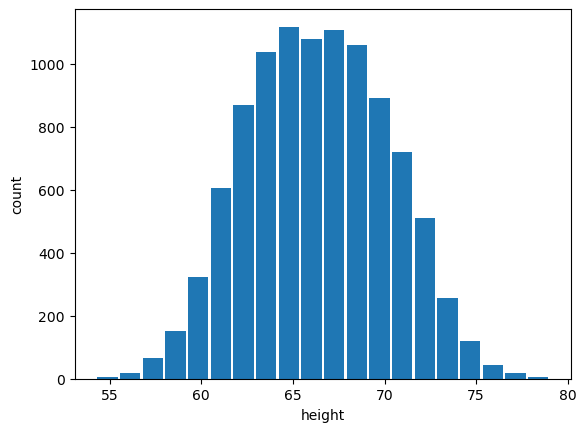

In [ ]:
# Create a histogram to visualize the distribution of heights
plt.hist(df['Height'], bins = 20, rwidth=0.9)
plt.xlabel("height")
plt.ylabel("count")
plt.show

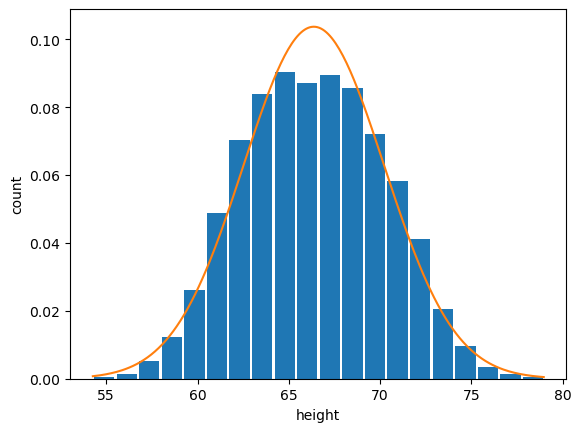

In [ ]:
plt.hist(df['Height'], bins = 20, rwidth=0.9, density=True)
plt.xlabel("height")
plt.ylabel("count")

# Overlay the normal distribution curve (Probability Density Function)
rng = np.arange(df['Height'].min(), df['Height'].max(), 0.1 )
plt.plot(rng, norm.pdf(rng, df['Height'].mean(), df['Height'].std()))

### Outlier Detection Using the Empirical Rule (3 Standard Deviations)

For normally distributed data, the **Empirical Rule** states that approximately **99.7%** of data points lie within **three standard deviations** of the mean. With this knowledge, it's safe to assume that any data point falling outside of this range is likely an outlier. I will use this to calculate my lower and upper boundaries


In [ ]:
# Calculate the mean and standard deviation of the 'Height' column
mean_height = df['Height'].mean()
std_height = df['Height'].std()

# Calculate the upper and lower thresholds
upper_threshold = mean_height + 3 * std_height
lower_threshold = mean_height - 3 * std_height

print(f"Upper Threshold: {upper_threshold:.2f}")
print(f"Lower Threshold: {lower_threshold:.2f}")

Upper Threshold: 77.91
Lower Threshold: 54.82


### Filtering Out the Outliers

With these thresholds, I can see which data points fall outside this range. I will then create a new DataFrame that excludes these outliers.

In [ ]:
# Show the outliers above the upper threshold
print("Upper Outliers:")
df[df["Height"] > upper_threshold]

Upper Outliers:


,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783


In [ ]:
# Show the outliers below the lower threshold
print("\nLower Outliers:")
df[df['Height'] < lower_threshold]


Lower Outliers:


,Gender,Height,Weight
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [ ]:
# Create a new DataFrame that excludes the outliers
df_filtered = df[(df['Height'] > lower_threshold) & 
                 (df['Height'] < upper_threshold)]

df_filtered.sample(10)

,Gender,Height,Weight
7840,Female,64.009873,127.955175
5464,Female,66.892737,161.098982
181,Male,69.553385,210.871799
1072,Male,68.322982,178.413189
9926,Female,63.171535,142.747754
6088,Female,66.422117,156.752631
1825,Male,64.608099,172.315967
544,Male,68.403726,206.014940
8274,Female,64.405332,127.943947
944,Male,70.811262,201.224277


In [18]:
# Compare the shapes of the original and filtered DataFrames
print("\nOriginal DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)


Original DataFrame shape: (10000, 3)
Filtered DataFrame shape: (9993, 3)


## Example 2: Height and Weight Dataset (Z-Score Method)

The Z-score method is another way to apply the same logic as the standard deviation method. Instead of calculating a specific upper and lower threshold based on the data's units, the Z-score standardizes the data. Each data point is converted to a Z-score, which tells you how many standard deviations it is away from the mean. We can then filter out any data point with a Z-score above 3 or below -3

### Applying the Z-Score Formula

First, I'll calculate the Z-score for each data point in the 'Height' column and add these values to a new column called z-score. This makes it simple to see how far each point is from the mean and allows for easy filtering in the future.

In [20]:
df['zscore'] = (df['Height'] - df["Height"].mean()) / df['Height'].std()
df.sample(10)

,Gender,Height,Weight,zscore
1534,Male,72.279517,198.836515,1.536560
775,Male,65.453957,175.844485,-0.237452
1945,Male,75.009944,221.454089,2.246217
8953,Female,61.775039,128.342568,-1.193629
6414,Female,64.095518,149.274100,-0.590520
3137,Male,69.923714,207.074913,0.924270
6933,Female,62.311533,136.236833,-1.054190
6663,Female,66.235095,145.217178,-0.034429
768,Male,69.553614,203.811091,0.828078
5989,Female,60.978009,125.104336,-1.400783


In [22]:
# Notice how this is identical to the standard deviation method
df[df['zscore'] > 3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [23]:
df[df['zscore']  < -3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [24]:
df_filteredZ = df[(df['zscore'] > -3) & (df['zscore'] < 3)]
df_filteredZ.sample(10)

,Gender,Height,Weight,zscore
6830,Female,60.398516,126.983077,-1.551397
853,Male,70.613162,187.472024,1.103462
3432,Male,69.710176,184.055959,0.868770
1974,Male,70.866869,199.657175,1.169403
3126,Male,71.594783,201.260629,1.358593
4596,Male,71.368891,205.216922,1.299882
6126,Female,59.512982,106.636430,-1.781554
5072,Female,60.578063,118.242812,-1.504732
3176,Male,67.374765,188.772154,0.261780
8652,Female,59.836041,103.265961,-1.697588


In [26]:
# Compare the shapes of the original and filtered DataFrames
print("\nOriginal DataFrame shape:", df.shape)
print("Filtered DataFrame shape (std):", df_filtered.shape)
print("Filtered DataFrame shape (z-score):", df_filteredZ.shape)


Original DataFrame shape: (10000, 4)
Filtered DataFrame shape (std): (9993, 3)
Filtered DataFrame shape (z-score): (9993, 4)


## Example 3: Bangalore House Prices (A Hybrid Approach)

For this final example, I'll use the Bangalore house price dataset again. This time, I'll apply a more advanced, **two-step hybrid method** for outlier removal. This is often necessary for real-world data that is highly skewed and doesn't perfectly follow a normal distribution.

The process will be:
1.  **Initial Trim:** Use quantiles to remove the most extreme and obvious outliers.
2.  **Refined Cut:** Apply the standard deviation or Z-score method on the *already-trimmed* data to remove the remaining, less extreme outliers.

### Step 1: Initial Filtering with Quantiles

To handle the most extreme data entry errors or luxury properties, I'll start by trimming the top and bottom 0.1% of the data using quantiles. This gives a cleaner, more reasonable distribution to work with before applying the next method.

In [27]:
CSV_PATH = "data/bhp.csv"
df = pd.read_csv(CSV_PATH)
df.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9695,Rajiv Nagar,4 BHK,2330.0,5.0,175.00,4,7510
9935,Thigalarapalya,3 BHK,1830.0,3.0,133.00,3,7267
7244,Uttarahalli,2 BHK,1099.0,2.0,65.00,2,5914
12982,other,2 BHK,1025.0,2.0,43.04,2,4199
2850,9th Phase JP Nagar,4 Bedroom,1200.0,3.0,188.00,4,15666
13056,Yelahanka New Town,3 BHK,1000.0,2.0,48.00,3,4800
5377,Uttarahalli,3 BHK,1300.0,2.0,47.00,3,3615
1414,Horamavu Banaswadi,2 BHK,1156.0,2.0,46.00,2,3979
8132,Rajaji Nagar,3 BHK,1800.0,3.0,240.00,3,13333
11668,other,2 BHK,1275.0,2.0,76.00,2,5960


In [33]:
# Define the upper and lower quantile thresholds
upper_quantile = df['price_per_sqft'].quantile(.999)
lower_quantile = df['price_per_sqft'].quantile(.001)

print(f"Upper Limit (4 std dev): {upper_quantile:.2f}")
print(f"Lower Limit (4 std dev): {lower_quantile:.2f}")

Upper Limit (4 std dev): 50959.36
Lower Limit (4 std dev): 1366.18


In [30]:
# Create a new DataFrame by filtering out the extreme quantiles
df_quantile = df[(df['price_per_sqft'] < upper_quantile) & (df["price_per_sqft"] > lower_quantile)]

In [31]:
print("Original DataFrame shape:", df.shape)
print("Shape after quantile filtering:", df_quantile.shape)

Original DataFrame shape: (13200, 7)
Shape after quantile filtering: (13172, 7)


### Step 2: Applying Standard Deviation on the Filtered Data

Now, on this pre-cleaned `df_quantile` DataFrame, I can apply the standard deviation method. Because real estate data is often still a bit skewed, I will use a more lenient threshold of **4 standard deviations** instead of the typical 3. This helps prevent us from removing too many valid data points.

In [32]:
mean_pps = df_quantile['price_per_sqft'].mean()
std_pps = df_quantile['price_per_sqft'].std()

upper_std_lim = mean_pps + 4 * std_pps
lower_std_lim = mean_pps - 4 * std_pps

print(f"Upper Limit (4 std dev): {upper_std_lim:.2f}")
print(f"Lower Limit (4 std dev): {lower_std_lim:.2f}")

Upper Limit (4 std dev): 23227.74
Lower Limit (4 std dev): -9900.43


In [34]:
# Create the final cleaned DataFrame
df_std_filtered = df_quantile[(df_quantile['price_per_sqft'] < upper_std_lim) & 
                              (df_quantile['price_per_sqft'] > lower_std_lim)]

print("\nShape after std dev filtering:", df_std_filtered.shape)
df_std_filtered.sample(5)


Shape after std dev filtering: (13047, 7)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9927,Banashankari,2 BHK,1175.0,2.0,41.13,2,3500
852,Kodichikkanahalli,2 BHK,995.0,2.0,41.00,2,4120
12872,Sarjapur Road,2 BHK,1367.0,2.0,80.00,2,5852
4955,Kaggadasapura,2 BHK,1010.0,2.0,55.00,2,5445
6438,Yeshwanthpur,9 Bedroom,2400.0,6.0,270.00,9,11250


### Visualizing the Final Distribution

After the two-step cleaning process, the histogram of `price_per_sqft` looks more like a normal distribution. This cleaned data is now far more suitable for doing tasks like training a machine learning model.

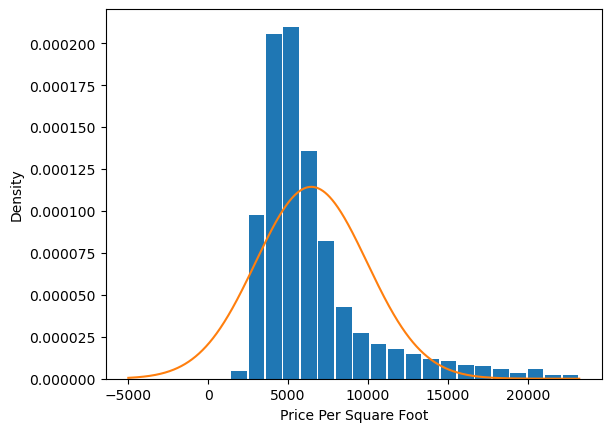

In [37]:
plt.hist(df_std_filtered['price_per_sqft'], bins=20, rwidth=0.9, density=True)
plt.xlabel("Price Per Square Foot")
plt.ylabel("Density")

rng = np.arange(-5000, df_std_filtered['price_per_sqft'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, df_std_filtered['price_per_sqft'].mean(), df_std_filtered['price_per_sqft'].std()))
plt.show()

### Reflection

By combining quantile filtering with the standard deviation/Z-score method, I created a robust cleaning pipeline that effectively handles the diverse and skewed nature of real estate pricing data. The resulting dataset is much cleaner and more reliable for analysis or model training.